In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib.inline

Load the datasets

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

Scaling the data

In [ ]:
x_train = x_train/255
x_test = x_test/255

Flettening the data

In [ ]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

Initializing the model and compiling 

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (28*28,), activation = "sigmoid")
])
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

Fitting the model

In [ ]:
model.fit(x_train_flattened, y_train, epochs=3)

Saving the model

In [ ]:
model.save('digit_classifier')

Load model from directory

In [ ]:
model = keras.models.load_model("digit_classifier")
model

Evaluate model

In [ ]:
model.evaluate(x_test_flattened, y_test)

Predict using the model

In [ ]:
y_predicted = model.predict(x_test_flattened)

Check predicted data and test data

In [ ]:
print(np.argmax(y_predicted[0]))
plt.imshow(x_test[0])

Get predicted digit from prediction matrix

In [ ]:
y_predicted_labels = [np.argmax(x) for x in y_predicted]
y_predicted_labels

Create a confusion matrix

In [51]:
cm = tf.math.confusion_matrix(labels= y_test, predictions= y_predicted_labels)

Text(114.0, 0.5, 'True Value')

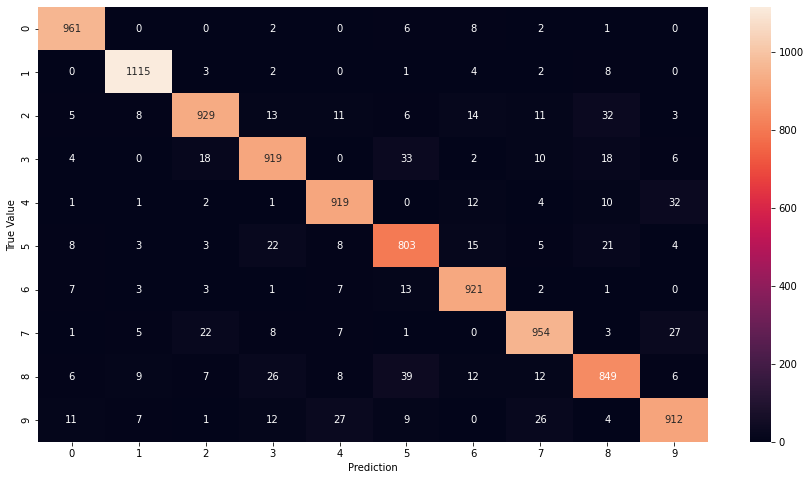

In [54]:
import seaborn as sns
plt.figure(figsize = (15, 8))
sns.heatmap(cm, annot= True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True Value')


Trying with adding some hidden layer

In [64]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784, ), activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model.fit(x_train_flattened, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2666 - accuracy: 0.9247
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1234 - accuracy: 0.9639
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0859 - accuracy: 0.9747


In [65]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0927 - accuracy: 0.9707


[0.0926765501499176, 0.9707000255584717]

313/313 [==============================] - 1s 2ms/step


Text(114.0, 0.5, 'True Value')

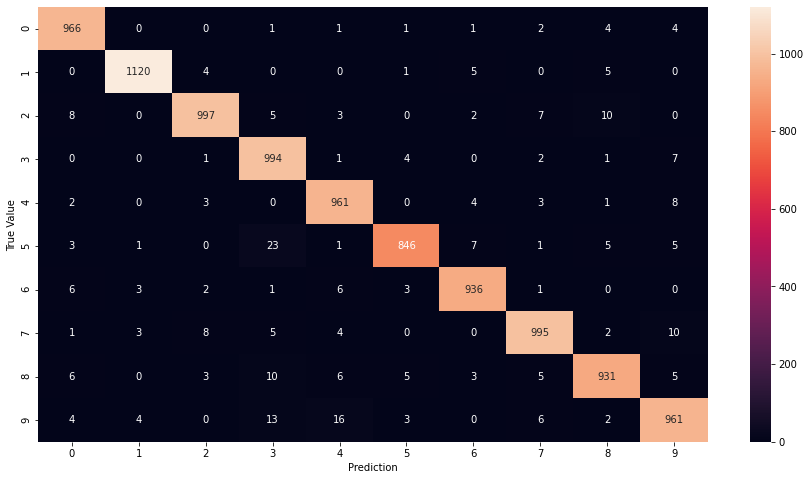

In [66]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(x) for x in y_predicted]
cm = tf.math.confusion_matrix(labels= y_test, predictions= y_predicted_labels)
import seaborn as sns
plt.figure(figsize = (15, 8))
sns.heatmap(cm, annot= True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True Value')

Creating the model using Flatten layer instead of flattening manually

In [67]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model.fit(x_train, y_train, epochs =3)

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2782 - accuracy: 0.9214
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1230 - accuracy: 0.9639
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0861 - accuracy: 0.9745
